In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

import analysis

In [16]:
result_summary = pd.read_csv("summary.csv")
result_summary.tail()

,datetime,run_name,run_config,loss,val_loss,rms_dev,mae,std_diff,output_file,run_time,note
100,2025-06-02 12:57,"Variant:10068, Dataset:48.0%",data/run/2025-06-02 12:00/config_0.6.toml,"data/result/2025-06-02 12:57_Variant:10068, Da...","data/result/2025-06-02 12:57_Variant:10068, Da...",1.614985,0.045321,1.614349,"data/result/2025-06-02 12:57_Variant:10068, Da...",0:06:34.089474,48.0
101,2025-06-02 12:57,"Variant:10068, Dataset:56.0%",data/run/2025-06-02 12:00/config_0.7.toml,"data/result/2025-06-02 12:57_Variant:10068, Da...","data/result/2025-06-02 12:57_Variant:10068, Da...",1.846252,-0.733875,1.694129,"data/result/2025-06-02 12:57_Variant:10068, Da...",0:07:33.872033,56.0
102,2025-06-02 12:57,"Variant:10068, Dataset:64.0%",data/run/2025-06-02 12:00/config_0.8.toml,"data/result/2025-06-02 12:57_Variant:10068, Da...","data/result/2025-06-02 12:57_Variant:10068, Da...",1.444677,-0.791868,1.208319,"data/result/2025-06-02 12:57_Variant:10068, Da...",0:08:06.155888,64.0
103,2025-06-02 12:57,"Variant:10068, Dataset:72.0%",data/run/2025-06-02 12:00/config_0.9.toml,"data/result/2025-06-02 12:57_Variant:10068, Da...","data/result/2025-06-02 12:57_Variant:10068, Da...",0.679662,-0.096629,0.672757,"data/result/2025-06-02 12:57_Variant:10068, Da...",0:08:39.311343,72.0
104,2025-06-02 12:57,"Variant:10068, Dataset:80.0%",data/run/2025-06-02 12:00/config_1.0.toml,"data/result/2025-06-02 12:57_Variant:10068, Da...","data/result/2025-06-02 12:57_Variant:10068, Da...",0.551705,-0.021298,0.551293,"data/result/2025-06-02 12:57_Variant:10068, Da...",0:09:01.683536,80.0


,datetime,run_name,run_config,loss,val_loss,rms_dev,mae,std_diff,output_file,run_time,note,variant_id
33,2025-06-01 17:44,"Variant:3123,Data",data/run/2025-05-28 12:40/config_0.10.toml,data/result/2025-06-01 17:44_Dataset=10.0%/los...,data/result/2025-06-01 17:44_Dataset=10.0%/val...,3.543430,-0.329118,3.528112,data/result/2025-06-01 17:44_Dataset=10.0%/res...,0:03:06.837320,8.0,3123
34,2025-06-01 17:47,"Variant:3123,Data",data/run/2025-05-28 12:40/config_0.20.toml,data/result/2025-06-01 17:47_Dataset=20.0%/los...,data/result/2025-06-01 17:47_Dataset=20.0%/val...,4.871954,4.144711,2.560725,data/result/2025-06-01 17:47_Dataset=20.0%/res...,0:03:48.768381,16.0,3123
35,2025-06-01 17:51,"Variant:3123,Data",data/run/2025-05-28 12:40/config_0.30.toml,data/result/2025-06-01 17:51_Dataset=30.0%/los...,data/result/2025-06-01 17:51_Dataset=30.0%/val...,2.060528,1.031549,1.783727,data/result/2025-06-01 17:51_Dataset=30.0%/res...,0:04:54.180813,24.0,3123
36,2025-06-01 17:56,"Variant:3123,Data",data/run/2025-05-28 12:40/config_0.40.toml,data/result/2025-06-01 17:56_Dataset=40.0%/los...,data/result/2025-06-01 17:56_Dataset=40.0%/val...,2.626278,1.657691,2.037007,data/result/2025-06-01 17:56_Dataset=40.0%/res...,0:05:50.532444,32.0,3123
37,2025-06-01 18:02,"Variant:3123,Data",data/run/2025-05-28 12:40/config_0.50.toml,data/result/2025-06-01 18:02_Dataset=50.0%/los...,data/result/2025-06-01 18:02_Dataset=50.0%/val...,2.888641,1.679344,2.350329,data/result/2025-06-01 18:02_Dataset=50.0%/res...,0:06:36.768601,40.0,3123


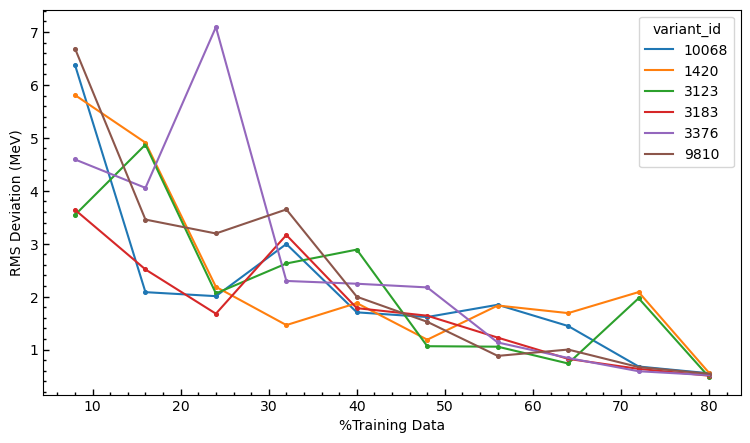

In [36]:
variants_df = result_summary.iloc[55:105]
variants_df = pd.concat([result_summary.iloc[33:43], variants_df])
variants_df.loc[variants_df.index[:10], "run_name"] = "Variant:3123,Data"
variants_df["note"] = variants_df["note"].astype(float)
variants_df.loc[variants_df.index[:10], "note"] *= 80

variant_id = [
    var_str.split(",")[0].split(":")[1] for var_str in variants_df["run_name"].values
]
variants_df["variant_id"] = variant_id


fig, ax = plt.subplots(figsize=(9, 5))
for label, group in variants_df.groupby("variant_id"):
    ax.plot(group["note"], group["rms_dev"], label=label)
    ax.scatter(group["note"], group["rms_dev"], s=7)
    analysis.plot.set_tick(ax)

ax.set_xlabel("%Training Data")
ax.set_ylabel("RMS Deviation (MeV)")
ax.legend(title="variant_id")
variants_df.head()

Text(0.5, 1.0, 'Mass Excess Difference of Several Models on A=195 Chain')

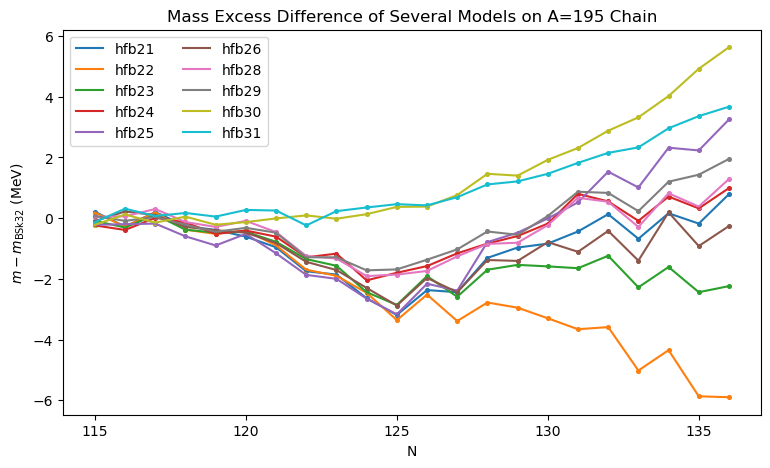

In [117]:
bsks_dir = Path("data/others/for_z")
bsks_files = sorted([f for f in bsks_dir.iterdir() if f.is_file()])
models = [f.name.split("-")[0] for f in bsks_files]

bsks_list = []

for id in range(20, 32):
    # df = pd.read_csv(bsks_files[id], delim_whitespace=True, skiprows=[0, 2])
    df = pd.read_csv(bsks_files[id], sep="\\s+", skiprows=[0, 2])
    df.insert(1, "N", df["A"] - df["Z"])
    df.insert(0, "model", models[id])
    df.rename(columns={"Mexp-Mcal": "diff", "Mcal": "m"}, inplace=True)
    df = df[["model", "Z", "N", "A", "m"]]
    df = df[(df["A"] == 195) & (df["Z"] <= 80) & (df["N"] >= 110)]

    bsks_list.append(df)

bsks_df = pd.concat(bsks_list[:-1], ignore_index=True)
bsks_df = pd.merge(bsks_df, bsks_list[-1], on=["Z", "N", "A"], how="inner")
bsks_df.rename(columns={"model_x": "model", "m_x": "m", "m_y": "m_bsk32"}, inplace=True)
bsks_df.drop("model_y", axis=1)
bsks_df["diff"] = bsks_df["m"] - bsks_df["m_bsk32"]

plt.figure(figsize=(9, 5))
for label, group in bsks_df.groupby("model"):
    plt.scatter(group["N"], group["diff"], s=7)
    plt.plot(group["N"], group["diff"], label=label)

plt.xlabel("N")
plt.ylabel(r"$m - m_\text{BSk32}$ (MeV)")
plt.legend(ncol=2)
plt.title("Mass Excess Difference of Several Models on A=195 Chain")